# Install Dependencies

In [69]:
!python -m pip install prettytable

# Import Dependencies

EPS: 6.05, EPS Next 5 Years: 0.0983%, P/E Ratio: 26.575, Current Price: $ 166.13
Intrinsic Value: $ 123.67596153846151 vs. Current Price: $ 166.13


/var/folders/kg/yc3v1y_96vj9m5s_743c5vn00000gn/T/ipykernel_5602/3939655776.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([purchase_date, symbol_data.index.values[-1]],[value_at_purchase_date,valuation.current_price],'k-', linestyle='-.', color=('r' if valuation.current_price < value_at_purchase_date else 'g'))
/var/folders/kg/yc3v1y_96vj9m5s_743c5vn00000gn/T/ipykernel_5602/3939655776.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([purchase_date, symbol_data.index.values[-1]],[value_at_purchase_date,valuation.current_price],'k-', linestyle='-.', color=('r' if valuation.current_price < value_at_purchase_date else 'g'))


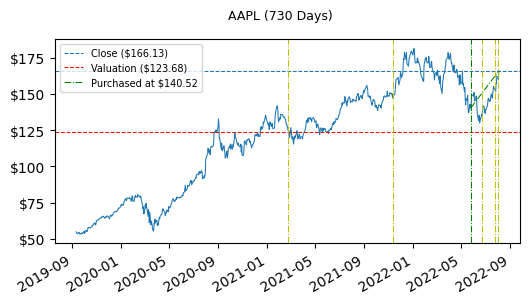

In [70]:
%run ./../asset_valuation/finviz_asset_valuation.ipynb

In [71]:
%run ./../../utilities/communication/telegram.ipynb

In [72]:
from telegram.ext import Dispatcher, CommandHandler, MessageHandler, Filters, InlineQueryHandler
from telegram import Update, InlineQueryResultArticle, InputTextMessageContent, ParseMode
from telegram.ext import CallbackContext
import prettytable as pt
import pandas as pd

# Bot Usage

## Config

In [73]:
bot_token = '5535601062:AAGpXCCTWa8OBajV3AeTPrmIOIFjPi_H3p8'

## Message Handlers

In [74]:
def info_handler(update: Update, context: CallbackContext):
    chat_id = update.effective_chat.id

    context.bot.send_message(chat_id=chat_id, 
                             text=f'Chat Id: {chat_id}\n\nFrostAura Consolidated')

def text_handler(update: Update, context: CallbackContext):
    context.bot.send_message(chat_id=update.effective_chat.id, text=update.message.text)

def inline_caps(update: Update, context: CallbackContext):
    query = update.inline_query.query

    if not query:
        return

    results = []
    results.append(
        InlineQueryResultArticle(
            id=query.upper(),
            title='Caps',
            input_message_content=InputTextMessageContent(query.upper())
        )
    )
    context.bot.answer_inline_query(update.inline_query.id, results)

def handlers_registration(dispatcher: Dispatcher):
    print('Registering dispatchers.')

    start_handler = CommandHandler('info', info_handler)
    dispatcher.add_handler(start_handler)
    
    text_message_handler = MessageHandler(Filters.text & (~Filters.command), text_handler)
    dispatcher.add_handler(text_message_handler)

    inline_caps_handler = InlineQueryHandler(inline_caps)
    dispatcher.add_handler(inline_caps_handler)

In [75]:
data = {
    'Column 1': [
        'Col 1 row 1',
        'Col 1 row 2'
    ],
    'Column 2': [
        'Col 2 row 1',
        'Col 2 row 2'
    ]
}
dataframe = pd.DataFrame(data)

In [76]:
with TelegramBot(bot_token=bot_token, register_handlers=handlers_registration) as context:
    #context.bot.send_message(chat_id='1551490751', text="`Dynamic message here...`")
    #context.bot.send_message(chat_id='1551490751', text='<b>Example message</b> where the previous is bold...', parse_mode=ParseMode.HTML)
    #context.send_dataframe(chat_id='1551490751', dataframe=dataframe)
    context.send_figure(chat_id='1551490751', figure=plot.get_figure())

Registering dispatchers.
